In [1]:
# DAL Library
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox() 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”

Attaching package: ‘daltoolbox’


The following objects are masked from ‘package:base’:

    jitter, transform




## Discretization & smoothing
Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. 

Smoothing is a technique that creates an approximating function that attempts to capture important patterns in the data while leaving out noise or other fine-scale structures/rapid phenomena.

An important part of the discretization/smoothing is to set up bins for proceeding the approximation.

## general function to evaluate different smoothing technique

In [2]:
iris <- datasets::iris
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
# smoothing using regular interval
obj <- smoothing_inter(n = 2)  
obj <- fit(obj, iris$Sepal.Length)
sl.bi <- transform(obj, iris$Sepal.Length)
print(table(sl.bi))
obj$interval

sl.bi
5.32842105263158 6.73272727272727 
              95               55 


[1] 4.3 6.1 7.9

In [4]:
entro <- smoothing_evaluation(as.factor(names(sl.bi)), iris$Species)
print(entro$entropy)

[1] 1.191734


In [5]:
# smoothing using regular frequency

obj <- smoothing_freq(n = 2)  
obj <- fit(obj, iris$Sepal.Length)
sl.bi <- transform(obj, iris$Sepal.Length)
print(table(sl.bi))
obj$interval

sl.bi
5.19875    6.58 
     80      70 


[1] 4.3 5.8 7.9

In [6]:
entro <- smoothing_evaluation(as.factor(names(sl.bi)), iris$Species)
print(entro$entropy)

[1] 1.097573


In [7]:
# smoothing using clustering
obj <- smoothing_cluster(n = 2)  
obj <- fit(obj, iris$Sepal.Length)
sl.bi <- transform(obj, iris$Sepal.Length)
print(table(sl.bi))
obj$interval

sl.bi
5.22409638554217 6.61044776119403 
              83               67 


[1] 4.300000 5.917272 7.900000

In [8]:
entro <- smoothing_evaluation(as.factor(names(sl.bi)), iris$Species)
print(entro$entropy)

[1] 1.12088


## Optimizing the number of binnings

In [9]:
opt_obj <- smoothing_inter(n=20)
obj <- optimize(opt_obj, iris$Sepal.Length, do_plot=TRUE)
obj$n

ERROR: Error in f(arg, ...): could not find function "f"


In [10]:
obj <- fit(obj, iris$Sepal.Length)
sl.bi <- transform(obj, iris$Sepal.Length)
print(table(sl.bi))

sl.bi
4.52727272727273 5.00294117647059             5.49 5.88333333333333 
              11               34               20               30 
           6.352 6.76666666666667 7.23333333333333 7.71666666666667 
              25               18                6                6 


[1] 8

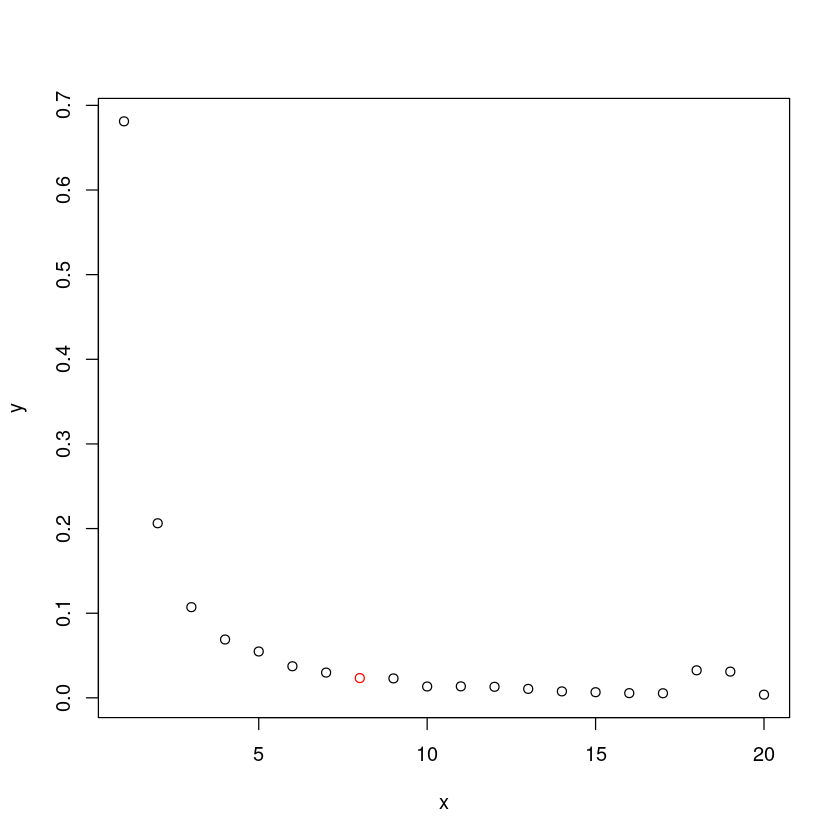

In [11]:
opt_obj <- smoothing_freq(n=20)
obj <- optimize(opt_obj, iris$Sepal.Length, do_plot=TRUE)
obj$n

In [12]:
obj <- fit(obj, iris$Sepal.Length)
sl.bi <- transform(obj, iris$Sepal.Length)
print(table(sl.bi))

sl.bi
4.69090909090909 5.04736842105263 5.38888888888889  5.7047619047619 
              22               19               18               21 
            6.02            6.315             6.65 7.31176470588235 
              15               20               18               17 
